<a href="https://colab.research.google.com/github/OviRata/Machine-Learning/blob/main/Applying_KNN_on_a_Telecom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the dataset.**

In [1]:
!mkdir data && curl -o data/telecom_churn.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson04/notebooks/data/telecom_churn.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  273k  100  273k    0     0   560k      0 --:--:-- --:--:-- --:--:--  560k


In [2]:
import pandas as pd
dataset = pd.read_csv("data/telecom_churn.csv")
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**For the *Voice mail plan* column, change the values from No/Yes to 0/1**

In [3]:
d={"Yes":1, "No":0}
dataset["Voice mail plan"]=dataset["Voice mail plan"].map(d)

**Extract the X dataset from the dataframe, only by numerical features.**

**The target characteristic is *Churn*.**

In [4]:
features = ["Voice mail plan", "Number vmail messages", "Total day minutes", "Total day calls", "Total eve minutes", "Total eve calls", "Total night minutes", "Total night calls", "Total intl minutes", "Total intl calls", "Customer service calls"]
X =dataset.drop(["State", "International plan", "Churn"], axis=1)
y =dataset["Churn"]

**Imparte setul de date in: date si label de antrenare, date si labbel de test. Foloseste functia *train_test_split* din *sklearn*.**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode
X_train, X_test, Y_train, Y_test =train_test_split(X, y, test_size=0.3, random_state=42)

**Import the KNearestClassifier model from sklearn. Train it with the *fit()* method and predict the Y values for X_test using the *predict()* method.**

Timpul de invatare a fost de:  8.550325870513916


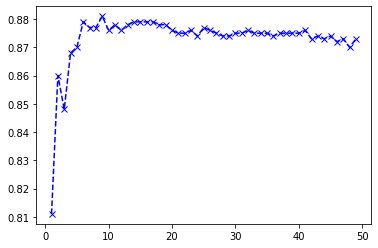

In [6]:


from sklearn.neighbors import KNeighborsClassifier
import time

start = time.time()

accuracy_vals = []

for k in range(1, 50):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, Y_train)
  y_hat = knn_model.predict(X_test)
  accuracy_vals.append(accuracy_score(Y_test, y_hat) )


plt.plot(range(1, len(accuracy_vals)+1 ), accuracy_vals, color='blue', marker='x', linestyle='dashed')

end=time.time()

print("The learning time is: ", end-start)


**Specify the accuracy of the obtained model.** 


In [7]:
mx=0; ind=0;
for i in range(0, len(accuracy_vals) ):
  if accuracy_vals[i]>mx :
    mx=accuracy_vals[i];
    ind=i;

print(f"The accuracy of the model is: {mx}, for k={ind+1}");


The accuracy of the model is: 0.881, for k=9


## Using my own implementation of KNN algorithm, and applying it on the examined dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interprete

The learning time is:  457.71831917762756
The accuracy of the model is:0.881 for k=10 


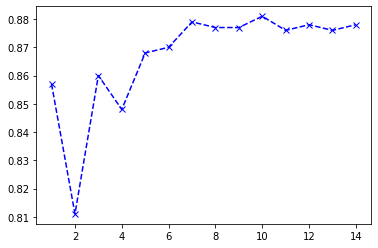

In [12]:

def euclidean_distance(point_a, point_b):
    distance = np.linalg.norm(point_a - point_b)
    return distance





class Heap():
    heap=[];
    n=0;
    def __init__(self):
        self.n=1;
        self.heap=[0];
    
    # Complexity: O(log(n) )
    def insert(self, x):
        self.heap.append(x);
        self.n+=1;
        cr=self.n-1;
        while cr>1:
            up=int(cr/2);
            up1=self.heap[up]; cr1=self.heap[cr];
            if up1<cr1:
                self.heap[cr]=up1;
                self.heap[up]=cr1;
            else:
                break;
            cr=up;

    #Complexity: O(log(n) )
    def erase_root(self):
  
        
        if self.n<2:
            return ;

        self.heap[1]=self.heap[self.n-1];
        cr=1;
        self.n-=1;
        self.heap.pop();
        lt=rt=lt1=rt1=cr1=-1;
        while (cr*2+1)<self.n:
            lt=cr*2; rt=cr*2+1;
            lt1=self.heap[lt]; rt1=self.heap[rt];
            cr1=self.heap[cr];
            if (rt1>lt1) and (rt1>cr1):
                self.heap[cr*2+1]=cr1;
                self.heap[cr]=rt1;
                cr=rt;
            elif (  lt1>cr1  ):
                self.heap[cr*2]=cr1;
                self.heap[cr]=lt1;
                cr=lt;
            else:
                break;
      
        if (cr*2<self.n) and (self.heap[cr*2]>self.heap[cr]):
            temp=self.heap[cr*2];
            self.heap[cr*2]=self.heap[cr];
            self.heap[cr]=temp;
            cr=cr*2;

    #Complexity: O(1)
    def get_max(self):
        return self.heap[1];
    
    #Complexity: O(1)
    def size(self):
        return self.n;





#Complexity of the knn_heap algorithm: O( (n^2)*log(k) )
def knn_heap(X_test, X_train, Y_train, k):
  y_hat=[]
  
  X_test_numpy=X_test.to_numpy();
  X_train_numpy=X_train.to_numpy();
  Y_train_numpy=Y_train.to_numpy();

  for cr in X_test_numpy:
    cnt=[0, 0]
    h=Heap();

    for i in range(0, k):
      h.insert( (euclidean_distance(X_train_numpy[i], cr), i) );

    for i in range(k, len(X_train_numpy) ):
      h.erase_root();
      h.insert( (euclidean_distance(X_train_numpy[i], cr), i)  );


    for i in range(k):
      cnt[Y_train_numpy[ h.get_max()[1] ] ]+=1;
      h.erase_root();
    
    if cnt[0]>cnt[1]:
      y_hat.append(0)
    else:
      y_hat.append(1)
   
  
  return y_hat






start=time.time();

mx=0; ind=0;

accuracy_vals=[];

for k in range(1, 15):
  y_hat = knn_heap(X_test, X_train, Y_train, k)
  accuracy_vals.append(accuracy_score(Y_test, y_hat) )
  if( accuracy_vals[-1]>mx ):
    mx=accuracy_vals[-1]; ind=k;


plt.plot(range(1, len(accuracy_vals)+1 ), accuracy_vals, color='blue', marker='x', linestyle='dashed')

end=time.time()

print("The learning time is: ", end-start)
print(f"The accuracy of the model is:{mx} for k={ind} ")






